<a href="https://colab.research.google.com/github/aperfilyeva/Public/blob/main/Question%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 5: Regularization Methods**

In [2]:
#  a) Pick at least 100 sample points from the interval [0; 5].
#  For the sample points, add some random noise - chosen from a normal distribution - to the target y = f(x).
#  Record the values of x and y in a data-frame.

import numpy as np # Import numpy
import pandas as pd # Import pandas

np.random.seed(3) # Fix a seed for reproducibility purposes

# Pick at least 100 sample points from the interval [0; 5].
x = np.random.uniform(0, 5, 100) # Create a numpy array as the feature 'x'

# Create the target 'y' and add some noise chosen from a normal distribution with mean 0 and std 0.3
y = np.sin(x)**2 + 2*np.cos(x) + np.random.normal(0, 0.3, x.shape[0])

# Construct a dataframe with two columns 'x' and 'y'
df = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])
df.head() # Display the first few rows of 'df'

,x,y
0,2.753990,-1.524551
1,3.540739,-1.943125
2,1.454524,1.262082
3,2.554138,-1.007157
4,4.464735,0.442419


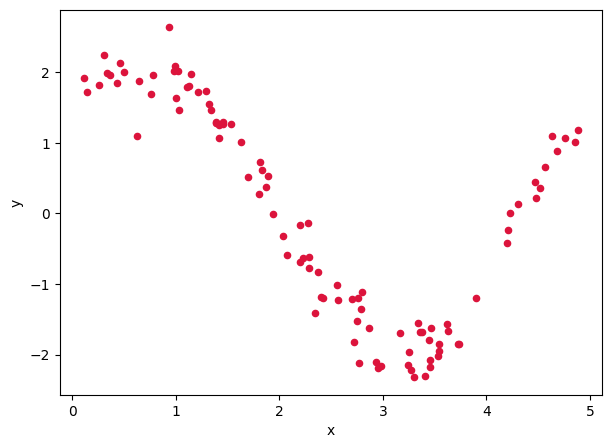

In [3]:
import matplotlib.pyplot as plt # Import matplotlib
df.plot.scatter(x='x', y='y', color='crimson', figsize=(7,5)) # Scatter plot of '(x, y)'
plt.show()

In [4]:
# b) Construct all monomials up to power 15

power_col = ['x^%d' %(i) for i in range(2, 16)] # Create name for the power columns

for col in power_col:
   power = int(col.split('^')[1]) # Extract 'power'
   df[col] = df['x']**power  # Construct the column 'x^power'
df = df[['x'] + power_col + ['y']] # Change the order of columns (put 'y' at the end)
df.head()

,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15,y
0,2.753990,7.584458,20.887518,57.524007,158.420511,436.288427,1201.533752,3309.011352,9112.982563,2.509706e+04,6.911704e+04,1.903476e+05,5.242153e+05,1.443683e+06,3.975889e+06,-1.524551
1,3.540739,12.536833,44.389657,157.172193,556.505733,1970.441614,6976.819693,24703.098371,87467.226618,3.096986e+05,1.096562e+06,3.882640e+06,1.374742e+07,4.867601e+07,1.723491e+08,-1.943125
2,1.454524,2.115639,3.077247,4.475929,6.510345,9.469451,13.773541,20.033942,29.139843,4.238459e+01,6.164939e+01,8.967050e+01,1.304279e+02,1.897104e+02,2.759383e+02,1.262082
3,2.554138,6.523621,16.662229,42.557632,108.698065,277.629862,709.104988,1811.152014,4625.932230,1.181527e+04,3.017783e+04,7.707834e+04,1.968687e+05,5.028299e+05,1.284297e+06,-1.007157
4,4.464735,19.933857,88.999383,397.358638,1774.100929,7920.890106,35364.673480,157893.887376,704954.329214,3.147434e+06,1.405246e+07,6.274050e+07,2.801197e+08,1.250660e+09,5.583866e+09,0.442419


In [6]:
# c) Perform the ordinary polynomial regression (up to order 13) to predict y.
#  WHERE ID THE ORDER OF 13 REFLECTED?

from sklearn.linear_model import LinearRegression  # Import 'LinearRegression' from sklearn

def do_linear_reg(df, power):     # Defining a function to do polynomial regression on 'df'
    cols = ['x']
    if power > 1:
        cols += ['x^%d' %(j) for j in range(2, power+1)]  # Considering columns up to 'power'+1

    X = df[cols].values     # Features of regression
    y = df['y'].values      # Target of regression

    lin_reg = LinearRegression()  # Instantiate 'LinearRegression'
    lin_reg.fit(X, y)             # Fit the data

    r2_score = lin_reg.score(X, y)   # Calculate R^2 score
    coefs = lin_reg.coef_            # Calculate the coefficients/weights of regression
    intercept = lin_reg.intercept_   # Calculate the intercept/bias term

    y_pred = lin_reg.predict(X)      # Predict the target
    df['yhat'] = y_pred             # Add prediction to 'df'
    plt.plot(df['x'], df['yhat'], color='green')       # Plot the prediction
    plt.plot(df['x'], df['y'], '.', color='crimson')   # Plot the truth target
    plt.gcf().set_size_inches(8, 5)
    plt.show()

    return r2_score, coefs, intercept    # Spit out R^2-score, weights, bias term



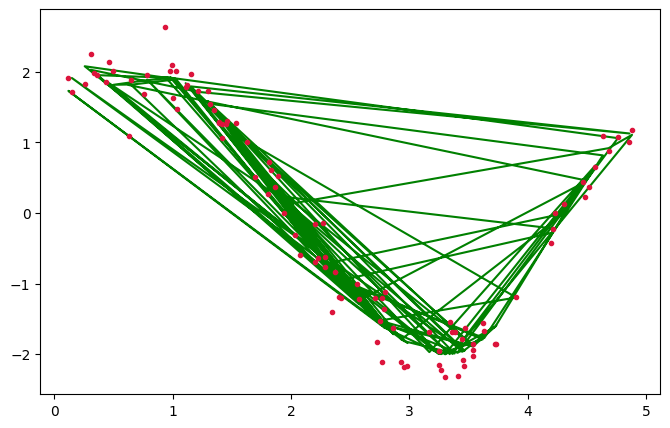

(0.9734913759618381,
 array([ 3.09730502e+01, -1.48542355e+02,  3.56211595e+02, -4.99581173e+02,
         4.47455632e+02, -2.69507558e+02,  1.11813700e+02, -3.20439777e+01,
         6.22994479e+00, -7.83967630e-01,  5.75626370e-02, -1.87122121e-03]),
 -0.3712319561994149)

In [7]:
do_linear_reg(df, 12)  # Perform regression up to power 13 ????